In [2]:
import pandas as pd
csv_file = "10802_2020pscf.csv"
df = pd.read_csv(csv_file)

df.head(1)


,Date,Page_Name,Page_ID,Link,Type,All_Reaction_Count,LIKE_COUNT,WOW_COUNT,LOVE_COUNT,HAHA_COUNT,SAD_COUNT,ANGRY_COUNT,Comment_Count,Share_Count,Message,Link_Title,Link Description,created_time
0,2020/01/11 23:00:48,蔡英文 Tsai Ing-wen,46251501064,NaN,photo,444772,402499,139,40762,1050,119,203,24666,20125,今天晚上，是屬於全體台灣人民的晚上。謝謝台灣人民的勇氣，謝謝台灣人民的堅持。\n \n各位...,NaN,NaN,1578754848000


In [3]:
ser_a = df['Date']
type(ser_a)

df_a = pd.DataFrame(df['Date'])
type(df_a)

pandas.core.frame.DataFrame

In [5]:
df.tail()

,Date,Page_Name,Page_ID,Link,Type,All_Reaction_Count,LIKE_COUNT,WOW_COUNT,LOVE_COUNT,HAHA_COUNT,SAD_COUNT,ANGRY_COUNT,Comment_Count,Share_Count,Message,Link_Title,Link Description,created_time
1679,2019/04/07 20:29:26,宋楚瑜找朋友,491399324358361,NaN,link,203,200,0,3,0,0,0,7,0,收假的夜晚，大家不妨在待會21:40-22:00，收看美國之音節目《海峽論談》，今晚將播出美...,美国之音中文网,美国之音中文官方脸书,1554640166000
1680,2020/01/01 11:55:23,宋楚瑜找朋友,491399324358361,NaN,photo,85,75,0,10,0,0,0,21,1,NaN,宋楚瑜找朋友's cover photo,NaN,1577850923000
1681,2019/12/22 09:33:17,蔡英文 Tsai Ing-wen,46251501064,NaN,video,60,59,0,1,0,0,0,0,0,選戰倒數20天，現在 陳建仁 Chen Chien-Jen副總統以及 賴清德副總統候選人，將...,2020 小英發言人,選戰倒數20天，現在陳建仁副總統以及賴清德副總統候選人，將領軍陪同我們雙北的立委候選人進行車...,1576978397000
1682,2019/04/12 04:01:08,韓國瑜,1863023523934803,NaN,video,55,52,0,2,0,1,0,2,1,想當年在政大東亞所讀書的時候，哈佛大學費正清研究中心之於我，就像南極大陸之於一名極限探險家一...,NaN,NaN,1555012868000
1683,2020/01/24 07:33:45,宋楚瑜找朋友,491399324358361,NaN,photo,60,51,0,8,0,1,0,2,1,NaN,宋楚瑜找朋友's cover photo,NaN,1579822425000


In [6]:
dff = set(df['Page_Name'])
dff

{'宋楚瑜找朋友', '蔡英文 Tsai Ing-wen', '韓國瑜'}

In [7]:
party = df[(df['LIKE_COUNT'] > 1000)].groupby("Page_Name")
party.size()

Page_Name
宋楚瑜找朋友              130
蔡英文 Tsai Ing-wen    955
韓國瑜                 552
dtype: int64

In [21]:
p1 = party.get_group("蔡英文 Tsai Ing-wen")['LIKE_COUNT'].agg('sum')
p2 = party.get_group("韓國瑜")['LIKE_COUNT'].agg('sum')
p3 = party.get_group("宋楚瑜找朋友")['LIKE_COUNT'].agg('sum')
print(p1, p2, p3)

41033358 22184286 455433


In [20]:
data = {'Name':['蔡英文 Tsai Ing-wen', '韓國瑜', '宋楚瑜找朋友'],
        'LIKE':[p1, p2, p3]}
print(p1, p2, p3)

41033358 22184286 455433


In [17]:
likedata = pd.DataFrame(data)
likedata

,Name,LIKE
0,蔡英文 Tsai Ing-wen,41033358
1,韓國瑜,22184286
2,宋楚瑜找朋友,455433


In [22]:
ser_a = df['Date']
type(ser_a)

df_a = pd.DataFrame(df['Date'])
type(df_a)

pandas.core.frame.DataFrame

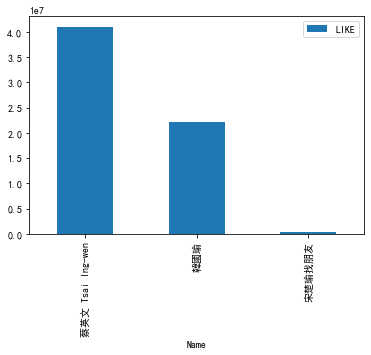

In [24]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']
likedata.plot.bar(x='Name', y='LIKE')

In [25]:
print(df.shape)
print(df.index)
print(df.describe())
print(df['Page_Name'].unique())
print ("each column has NaN\n", df.isnull().sum(),"\n")

(1684, 18)
RangeIndex(start=0, stop=1684, step=1)
            Page_ID  Link  All_Reaction_Count     LIKE_COUNT    WOW_COUNT  \
count  1.684000e+03   0.0         1684.000000    1684.000000  1684.000000   
mean   6.619445e+14   NaN        40679.567696   37824.638361    70.519002   
std    8.533402e+14   NaN        35327.415448   32317.909685   173.864534   
min    4.625150e+10   NaN           55.000000      51.000000     0.000000   
25%    4.625150e+10   NaN        19883.000000   18361.000000    16.000000   
50%    4.625150e+10   NaN        34353.500000   32482.000000    31.000000   
75%    1.863024e+15   NaN        51615.500000   48510.750000    67.000000   
max    1.863024e+15   NaN       444772.000000  402499.000000  3122.000000   

         LOVE_COUNT    HAHA_COUNT     SAD_COUNT   ANGRY_COUNT  Comment_Count  \
count   1684.000000   1684.000000   1684.000000   1684.000000    1684.000000   
mean    1881.125297    401.686461    289.128266    212.969121    4498.988124   
std     2684.127

In [26]:
df['Date'][0]
df['Date'][0].split("/")

['2020', '01', '11 23:00:48']

In [29]:
df['Year'] = df['Date'].apply(lambda x : x.split("/")[0])

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.rcParams['font.sans-serif'] = ['SimHei'] 
plt.rcParams['axes.unicode_minus'] = False
sns.set(font=['sans-serif'])
sns.set_style("whitegrid",{"font.sans-serif":['SimHei']})
likedf = df[(df['LIKE_COUNT'] > 1000)].groupby(by ='Page_Name').count().reset_index().sort_values('All_Reaction_Count')


likedf = df[(df['LIKE_COUNT'] > 1000)].groupby(by ='Page_Name').count().reset_index().sort_values('All_Reaction_Count')
likedf = likedf.rename(columns={'All_Reaction_Count': '文章數'})
print(likedf)
print(likedf.columns.values)

          Page_Name  Date  Page_ID  Link  Type  文章數  LIKE_COUNT  WOW_COUNT  \
0            宋楚瑜找朋友   130      130     0   130  130         130        130   
2               韓國瑜   552      552     0   552  552         552        552   
1  蔡英文 Tsai Ing-wen   955      955     0   955  955         955        955   

   LOVE_COUNT  HAHA_COUNT  SAD_COUNT  ANGRY_COUNT  Comment_Count  Share_Count  \
0         130         130        130          130            130          130   
2         552         552        552          552            552          552   
1         955         955        955          955            955          955   

   Message  Link_Title  Link Description  created_time  Year  
0      121          68                14           130   130  
2      541         296                52           552   552  
1      946         439                82           955   955  
['Page_Name' 'Date' 'Page_ID' 'Link' 'Type' '文章數' 'LIKE_COUNT' 'WOW_COUNT'
 'LOVE_COUNT' 'HAHA_COUNT' 'SAD_COU

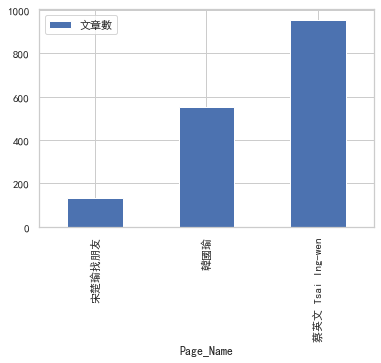

In [32]:
plt.rcParams['font.sans-serif']=['SimHei']

likedf.plot.bar(x='Page_Name', y='文章數')

In [33]:
df = pd.read_csv("10802_2020pscf.csv")
df.head()
likedf =  df.groupby(['Page_Name','Type']).count().reset_index()
likedf =  likedf[likedf['Page_Name'] == '宋楚瑜找朋友']
likedf['Page_ID'] = likedf['Page_ID'].apply(lambda x :x/likedf['Page_ID'].sum())
print(likedf['Page_ID'])

0    0.041667
1    0.630952
2    0.011905
3    0.315476
Name: Page_ID, dtype: float64


([<matplotlib.patches.Wedge at 0x167dce06948>,
 [Text(1.0905893469510741, 0.14357881569657108, 'link'),
  Text(-0.6858387274057755, 0.8600146742878441, 'photo'),
  Text(-0.4772722460010841, -0.9910656906568207, 'status'),
  Text(0.6025488674806079, -0.9202906401229108, 'video')],
 [Text(0.5948669165187676, 0.07831571765267512, '4.2%'),
  Text(-0.37409385131224115, 0.46909891324791486, '63.1%'),
  Text(-0.2603303160005913, -0.5405812858128112, '1.2%'),
  Text(0.3286630186257861, -0.5019767127943149, '31.5%')])

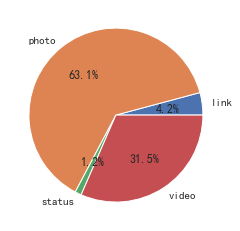

In [34]:
plt.pie(likedf['Page_ID'] , labels = likedf['Type'],autopct='%1.1f%%')

In [37]:
csv_file = "10802_2020pscf.csv"
df = pd.read_csv(csv_file)

df.head(1)

,Date,Page_Name,Page_ID,Link,Type,All_Reaction_Count,LIKE_COUNT,WOW_COUNT,LOVE_COUNT,HAHA_COUNT,SAD_COUNT,ANGRY_COUNT,Comment_Count,Share_Count,Message,Link_Title,Link Description,created_time
0,2020/01/11 23:00:48,蔡英文 Tsai Ing-wen,46251501064,NaN,photo,444772,402499,139,40762,1050,119,203,24666,20125,今天晚上，是屬於全體台灣人民的晚上。謝謝台灣人民的勇氣，謝謝台灣人民的堅持。\n \n各位...,NaN,NaN,1578754848000


In [40]:
df["Post_Date"] = df["Date"].str.split(" ").str.get(0).str.title() 
#df.head(1)

df["Hour"] = df["Date"].str.split(" ").str.get(1).str.title().str.split(":").str.get(0)
df.head(1)

,Date,Page_Name,Page_ID,Link,Type,All_Reaction_Count,LIKE_COUNT,WOW_COUNT,LOVE_COUNT,HAHA_COUNT,SAD_COUNT,ANGRY_COUNT,Comment_Count,Share_Count,Message,Link_Title,Link Description,created_time,Post_Date,Hour
0,2020/01/11 23:00:48,蔡英文 Tsai Ing-wen,46251501064,NaN,photo,444772,402499,139,40762,1050,119,203,24666,20125,今天晚上，是屬於全體台灣人民的晚上。謝謝台灣人民的勇氣，謝謝台灣人民的堅持。\n \n各位...,NaN,NaN,1578754848000,2020/01/11,23


In [41]:
df['Date'] = pd.to_datetime(df['Date'])

df['Week'] = df['Date'].dt.strftime('%A')
df.head(1)

,Date,Page_Name,Page_ID,Link,Type,All_Reaction_Count,LIKE_COUNT,WOW_COUNT,LOVE_COUNT,HAHA_COUNT,...,ANGRY_COUNT,Comment_Count,Share_Count,Message,Link_Title,Link Description,created_time,Post_Date,Hour,Week
0,2020-01-11 23:00:48,蔡英文 Tsai Ing-wen,46251501064,NaN,photo,444772,402499,139,40762,1050,...,203,24666,20125,今天晚上，是屬於全體台灣人民的晚上。謝謝台灣人民的勇氣，謝謝台灣人民的堅持。\n \n各位...,NaN,NaN,1578754848000,2020/01/11,23,Saturday


D:\anaconda\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


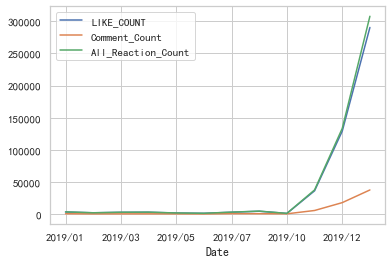

In [42]:
df_green = df[(df["Page_Name"] == "宋楚瑜找朋友" )]
like_green = df_green.groupby(df['Date'].dt.strftime('%Y/%m'))['All_Reaction_Count','LIKE_COUNT','WOW_COUNT','HAHA_COUNT','SAD_COUNT','ANGRY_COUNT','Comment_Count','Share_Count'].sum().reset_index()
like_green
like_green.plot(x='Date',y=['LIKE_COUNT','Comment_Count','All_Reaction_Count'])

In [45]:
df_blue = df[df['Page_Name']=='宋楚瑜找朋友']
df_post_blue = df.groupby(['Week','Hour'])['LIKE_COUNT'].count().reset_index(name='count')

df_post_blue

,Week,Hour,count
0,Friday,00,2
1,Friday,01,1
2,Friday,03,1
3,Friday,04,2
4,Friday,07,4
...,...,...,...
133,Wednesday,19,21
134,Wednesday,20,21
135,Wednesday,21,22
136,Wednesday,22,27


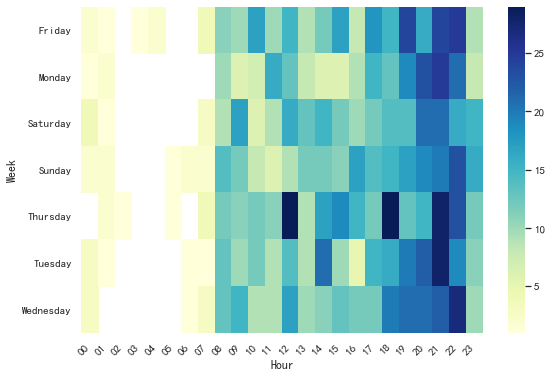

In [46]:
flights = df_post_blue.pivot("Week", "Hour", "count")
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(flights, fmt="d",cmap='YlGnBu', ax=ax)
label_y = ax.get_yticklabels()
plt.setp(label_y, rotation=360, horizontalalignment='right')
label_x = ax.get_xticklabels()
plt.setp(label_x, rotation=45, horizontalalignment='right')
plt.show()